[*********************100%%**********************]  1 of 1 completed


                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2021-04-01  13.57225  13.87000  13.51125  13.81175  13.783669  308276000
2021-04-05  13.86750  14.01400  13.73300  13.98750  13.959061  255672000
2021-04-06  13.99975  14.05425  13.77350  13.86150  13.833318  191744000
2021-04-07  13.88075  14.24350  13.71150  14.14350  14.114745  251284000
2021-04-08  14.25275  14.47150  14.24900  14.31700  14.287891  244416000
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 753 entries, 2021-04-01 to 2024-03-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       753 non-null    float64
 1   High       753 non-null    float64
 2   Low        753 non-null    float64
 3   Close      753 non-null    float64
 4   Adj Close  753 non-null    float64
 5   Volume     753 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 41.

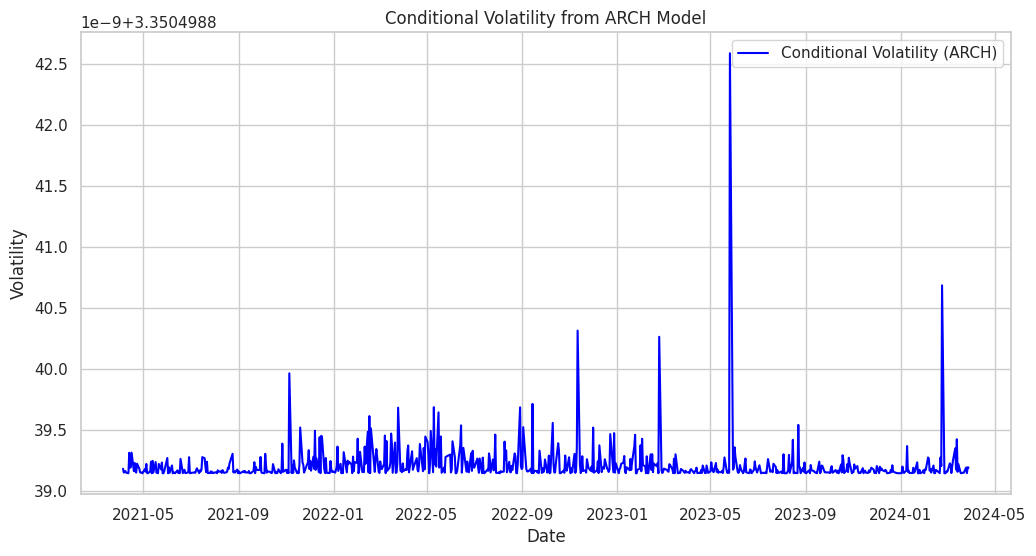


Ljung-Box Test for ARCH Model Residuals:
     lb_stat  lb_pvalue
10  11.01471   0.356373

Fitting GARCH Model...
GARCH Model Summary:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1963.28
Distribution:                  Normal   AIC:                           3934.57
Method:            Maximum Likelihood   BIC:                           3953.06
                                        No. Observations:                  752
Date:                Wed, Jul 24 2024   Df Residuals:                      751
Time:                        16:52:12   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
--------

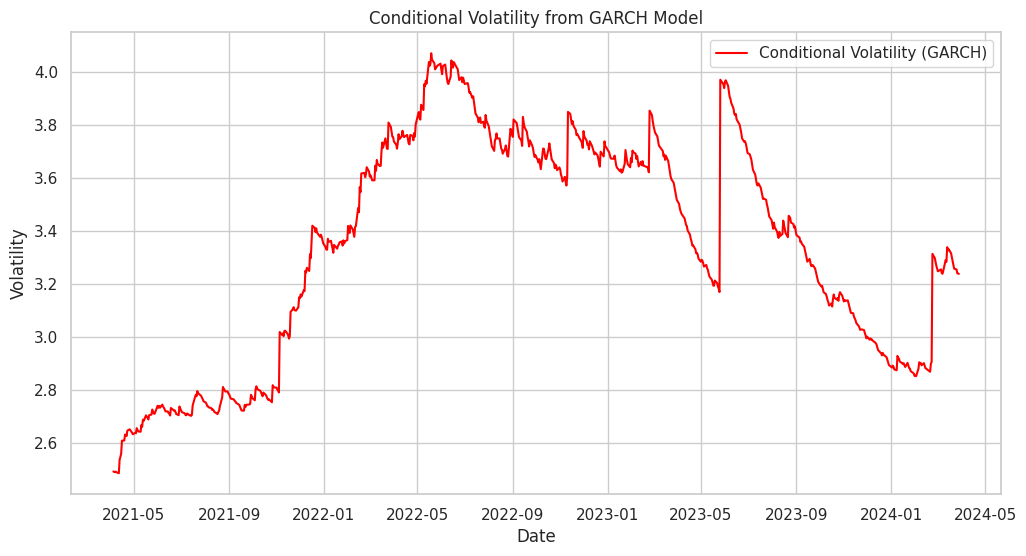


Ljung-Box Test for GARCH Model Residuals:
     lb_stat  lb_pvalue
10  11.01471   0.356373

Fitting GARCH Model with additional parameters...
Iteration:      5,   Func. Count:     36,   Neg. LLF: 1970.889378615022
Iteration:     10,   Func. Count:     68,   Neg. LLF: 1963.3354090148387
Iteration:     15,   Func. Count:     93,   Neg. LLF: 1963.2837143710533
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1963.2837143710533
            Iterations: 16
            Function evaluations: 97
            Gradient evaluations: 16

Forecast Mean (last 3 periods):
                 h.1
Date                
2024-03-28  0.375508
Forecast Residual Variance (last 3 periods):
                 h.1
Date                
2024-03-28  10.39194
Forecast Variance (last 3 periods):
                 h.1
Date                
2024-03-28  10.39194

Forecasting 90 days ahead...

90-day Forecast Residual Variance (last 3 periods):
                h.01       h.02       h.03  

In [8]:
# Import required libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.stats.diagnostic import acorr_ljungbox
import seaborn as sns

# Set plotting style
sns.set(style="whitegrid")

# Step 1: Download Historical Data
ticker = "NVDA"
data = yf.download(ticker, start="2021-04-01", end="2024-03-31")

# Check data structure
print(data.head())
print(data.info())

# Step 2: Calculate Returns
market = data["Adj Close"]
returns = 100 * market.pct_change().dropna()  # Convert to percentage returns

# Step 3: Fit an ARCH Model
print("\nFitting ARCH Model...")
arch_model_fit = arch_model(returns, vol='ARCH', p=1).fit(disp='off')
print("ARCH Model Summary:")
print(arch_model_fit.summary())

# Plot the conditional volatility from the ARCH model
plt.figure(figsize=(12, 6))
plt.plot(arch_model_fit.conditional_volatility, label='Conditional Volatility (ARCH)', color='blue')
plt.title('Conditional Volatility from ARCH Model')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

# Check residuals for autocorrelation
ljungbox_arch = acorr_ljungbox(arch_model_fit.resid, lags=[10])
print("\nLjung-Box Test for ARCH Model Residuals:")
print(ljungbox_arch)

# Step 4: Fit a GARCH Model
print("\nFitting GARCH Model...")
garch_model_fit = arch_model(returns, vol='Garch', p=1, q=1).fit(disp='off')
print("GARCH Model Summary:")
print(garch_model_fit.summary())

# Plot the conditional volatility from the GARCH model
plt.figure(figsize=(12, 6))
plt.plot(garch_model_fit.conditional_volatility, label='Conditional Volatility (GARCH)', color='red')
plt.title('Conditional Volatility from GARCH Model')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

# Check residuals for autocorrelation
ljungbox_garch = acorr_ljungbox(garch_model_fit.resid, lags=[10])
print("\nLjung-Box Test for GARCH Model Residuals:")
print(ljungbox_garch)

# Step 5: Fit GARCH Model with Additional Parameters
print("\nFitting GARCH Model with additional parameters...")
am = arch_model(returns, vol="Garch", p=1, q=1, dist="Normal")
res = am.fit(update_freq=5)

# Print forecast details
forecast_mean = res.forecast().mean
forecast_residual_variance = res.forecast().residual_variance
forecast_variance = res.forecast().variance

print("\nForecast Mean (last 3 periods):")
print(forecast_mean.iloc[-3:])
print("Forecast Residual Variance (last 3 periods):")
print(forecast_residual_variance.iloc[-3:])
print("Forecast Variance (last 3 periods):")
print(forecast_variance.iloc[-3:])

# Forecasting with a horizon of 90 days
print("\nForecasting 90 days ahead...")
forecasts = res.forecast(horizon=90)

# Print forecast residual variance for the 90-day horizon
print("\n90-day Forecast Residual Variance (last 3 periods):")
print(forecasts.residual_variance.iloc[-3:])

# Conclusion and Summary
print("\nAnalysis Summary:")
print("1. ARCH and GARCH models were successfully fitted to the returns data.")
print("2. Conditional volatility was plotted for both ARCH and GARCH models.")
print("3. Residuals were checked for autocorrelation using the Ljung-Box test.")
print("4. Forecasts were generated for a 90-day horizon, including variance and residual variance.")
